In [1]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2920, grad_fn=<NllLossBackward0>)


In [58]:
# TODO: Build a feed-forward network
model = nn.Sequential(
                     nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3028, grad_fn=<NllLossBackward0>)


In [71]:
x = torch.randn(3,3, requires_grad=True)
print(x)

tensor([[ 0.1800, -1.2938, -0.1568],
        [-0.3265,  0.6399,  0.5399],
        [ 0.0610,  1.4456, -0.1612]], requires_grad=True)


In [72]:
y = x**2
print(y)

tensor([[0.0324, 1.6739, 0.0246],
        [0.1066, 0.4095, 0.2915],
        [0.0037, 2.0897, 0.0260]], grad_fn=<PowBackward0>)


In [73]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [74]:
z = y.mean()
print(z)

tensor(0.5175, grad_fn=<MeanBackward0>)


In [75]:
print(x.grad)

None


In [76]:
z.backward()
print(x.grad)
print(2*x/9)

tensor([[ 0.0400, -0.2875, -0.0348],
        [-0.0725,  0.1422,  0.1200],
        [ 0.0135,  0.3212, -0.0358]])
tensor([[ 0.0400, -0.2875, -0.0348],
        [-0.0725,  0.1422,  0.1200],
        [ 0.0135,  0.3212, -0.0358]], grad_fn=<DivBackward0>)


# Loss and Autograd together


In [93]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [96]:
print('Before backward pass: \n', model[2].weight.grad)

loss.backward()

print('After backward pass: \n', model[2].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 7.5960e-04,  0.0000e+00, -1.0865e-03,  ..., -4.3992e-04,
          4.1695e-04,  5.6578e-04],
        [-1.2480e-03,  0.0000e+00,  1.9976e-04,  ...,  2.0106e-03,
          6.2429e-04, -5.7429e-04],
        [ 1.0194e-03,  0.0000e+00,  4.4186e-04,  ...,  5.6193e-04,
         -4.6074e-05,  8.1523e-05],
        ...,
        [-1.6554e-03,  0.0000e+00, -1.1541e-03,  ..., -2.8535e-03,
         -6.6470e-04,  4.0578e-04],
        [-3.0974e-03,  0.0000e+00, -3.9057e-03,  ..., -3.7331e-05,
          1.4043e-04, -1.8184e-04],
        [ 9.9441e-04,  0.0000e+00, -8.6681e-04,  ...,  2.3199e-04,
          3.9418e-04,  6.3042e-04]])


# Training the network!

In [13]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now we know how to use all the individual parts so it's time to see how they work together. Let's consider just one learning step before looping through all the data. The general process with PyTorch:

- Make a forward pass through the network
- Use the network output to calculate the loss
- Perform a backward pass through the network with loss.backward() to calculate the gradients
- Take a step with the optimizer to update the weights
Below I'll go through one training step and print out the weights and gradients so you can see how it changes. Note that I have a line of code optimizer.zero_grad(). When you do multiple backwards passes with the same parameters, the gradients are accumulated. This means that you need to zero the gradients on each training pass or you'll retain gradients from previous training batches.

In [101]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
print(loss.item())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0346,  0.0075, -0.0243,  ..., -0.0262,  0.0271,  0.0190],
        [ 0.0204, -0.0107,  0.0112,  ..., -0.0150,  0.0293, -0.0259],
        [ 0.0314,  0.0012,  0.0093,  ...,  0.0076, -0.0251, -0.0213],
        ...,
        [ 0.0224,  0.0255, -0.0241,  ..., -0.0061, -0.0236, -0.0284],
        [ 0.0113, -0.0223, -0.0012,  ...,  0.0321, -0.0262,  0.0207],
        [ 0.0240, -0.0055, -0.0259,  ..., -0.0183, -0.0315, -0.0128]],
       requires_grad=True)
2.313371419906616
Gradient - tensor([[-0.0104, -0.0104, -0.0104,  ..., -0.0104, -0.0104, -0.0104],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0180, -0.0180, -0.0180,  ..., -0.0180, -0.0180, -0.0180],
        ...,
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        [ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        [-0.0033, -0.0033, -0.0033,  ..., -0.0033, -0.0033, -0.0033]])


In [102]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0346,  0.0075, -0.0243,  ..., -0.0262,  0.0271,  0.0190],
        [ 0.0204, -0.0107,  0.0112,  ..., -0.0150,  0.0293, -0.0259],
        [ 0.0314,  0.0012,  0.0093,  ...,  0.0076, -0.0251, -0.0213],
        ...,
        [ 0.0224,  0.0255, -0.0241,  ..., -0.0061, -0.0236, -0.0284],
        [ 0.0113, -0.0223, -0.0012,  ...,  0.0321, -0.0262,  0.0207],
        [ 0.0240, -0.0055, -0.0259,  ..., -0.0183, -0.0315, -0.0128]],
       requires_grad=True)


# Training for real

In [179]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.38777642299149084
Training loss: 0.18653204612561
Training loss: 0.13837089470581715
Training loss: 0.11205514033199913
Training loss: 0.09474295027194612


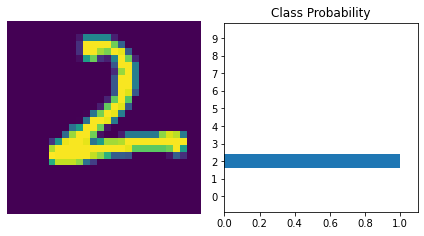

In [288]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)